# Test buổi 7,8

In [81]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pypyodbc as odbc
import squarify
import pyodbc
from sklearn.linear_model import LinearRegression #mô hình hồi quy tuyến tính
print('Completed import lib')

Completed import lib


## Test 1:

### Xử lý dataset

    '?' thay bằng null => thay null bằng giá trị mean() của cột, đối với giá trị category thì đắp bằng giá trị lặp lại nhiều nhất
    với những cột city và high thì cần đổi sang lượng tiêu thụ trên 100km = 235/ sao đó cần nomalzile data

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

In [83]:
dataset = pd.read_csv('imports-85.csv')
dataset.set_axis(['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style',
'drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders',
'engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price'], axis= 1, inplace= True)
dataset.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [84]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

Check giá trị trong các cột dữ liệu

In [85]:

t1 = dataset.columns.to_list()
for i in t1:
    print(i+': ',list(set(dataset[i])))

symboling:  [0, 1, 2, 3, -2, -1]
normalized-losses:  ['89', '?', '104', '137', '106', '186', '194', '77', '231', '121', '134', '168', '161', '118', '110', '129', '101', '128', '113', '85', '142', '108', '148', '83', '256', '197', '87', '91', '103', '95', '93', '125', '122', '81', '188', '102', '150', '145', '98', '154', '164', '78', '107', '158', '153', '74', '94', '90', '119', '115', '65', '192']
make:  ['isuzu', 'honda', 'peugot', 'porsche', 'alfa-romero', 'bmw', 'mitsubishi', 'toyota', 'audi', 'volvo', 'renault', 'subaru', 'dodge', 'chevrolet', 'mercedes-benz', 'mazda', 'mercury', 'volkswagen', 'plymouth', 'saab', 'nissan', 'jaguar']
fuel-type:  ['gas', 'diesel']
aspiration:  ['turbo', 'std']
num-of-doors:  ['four', 'two', '?']
body-style:  ['hardtop', 'sedan', 'convertible', 'wagon', 'hatchback']
drive-wheels:  ['fwd', '4wd', 'rwd']
engine-location:  ['rear', 'front']
wheel-base:  [102.4, 102.9, 104.5, 104.3, 97.0, 95.1, 100.4, 97.3, 107.9, 108.0, 95.7, 109.1, 96.6, 96.1, 95.3, 96.

Loại bỏ các giá trị '?' trong dataset

In [86]:
for a in list(dataset.columns.to_list()):
    dataset.drop(dataset[dataset[a]=='?'].index, inplace= True)

Chuẩn hóa các giá trị category

In [87]:
dataset['make'].replace({'alfa-romero': 0,'isuzu': 1,'mitsubishi': 2,'renault': 3,
'audi': 4,'jaguar': 5,'nissan': 6,'saab': 7,'bmw': 8,'mazda': 9,'peugot': 10,
'subaru': 11,'chevrolet': 12,'mercedes-benz': 13,'plymouth': 14,'toyota': 15,
'dodge': 16,'mercury': 17,'porsche': 18,'volkswagen': 19,'honda': 20,'volvo': 21}, inplace= True)

dataset['fuel-type'].replace({'diesel': 0,'gas':1}, inplace= True)

dataset['aspiration'].replace({'std': 0,'turbo':1}, inplace= True)

dataset['num-of-doors'].replace({'four': 4,'two':2}, inplace= True)

dataset['body-style'].replace({'hardtop':0, 'wagon':1, 'sedan':2, 'hatchback':3, 'convertible':4}, inplace= True)

dataset['drive-wheels'].replace({'4wd':0, 'fwd':1, 'rwd':2}, inplace= True)

dataset['engine-location'].replace({'front':0, 'rear':1}, inplace= True)

dataset['num-of-cylinders'].replace({'eight':8, 'five':5, 'four':4, 'six':6, 'three':3, 'twelve':12, 'two':2}, inplace= True)

dataset['fuel-system'].replace({'1bbl':0, '2bbl':1, '4bbl':2, 'idi':3, 'mfi':4, 'mpfi':5, 'spdi':6, 'spfi':7}, inplace= True)

dataset['engine-type'].replace({'dohc':0, 'dohcv':1, 'l':2, 'ohc':3, 'ohcf':4, 'ohcv':5, 'rotor':6}, inplace= True)


In [88]:
int64 =['normalized-losses','horsepower','peak-rpm','price']

for c in int64:
    dataset[c] = dataset[c].astype('int64')



float64 = ['bore','stroke',]

for d in float64:
    dataset[d] = dataset[d].astype('float64')

In [89]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 2 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    int64  
 2   make               159 non-null    int64  
 3   fuel-type          159 non-null    int64  
 4   aspiration         159 non-null    int64  
 5   num-of-doors       159 non-null    int64  
 6   body-style         159 non-null    int64  
 7   drive-wheels       159 non-null    int64  
 8   engine-location    159 non-null    int64  
 9   wheel-base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    int64  
 15  num-of-cylinders   159 non-null    int64  
 16  engine-size        159 non

### Liner Regression

Lọc ra các biến có correlation cao với price

In [90]:
sam = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors',
'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg']
#for i in sam:
    #x = np.array(dataset[i]).reshape(-1,1)
#y = np.array(dataset.price)


In [91]:
y = np.array(dataset.price)
for i in sam:
    x = np.array(dataset[i])
    corr = np.corrcoef(x ,y)
    print('Correlation '+i+': ', corr[0,1])

Correlation symboling:  -0.1627942814058449
Correlation normalized-losses:  0.2027612999070911
Correlation make:  -0.015498388775599888
Correlation fuel-type:  -0.26130532799343553
Correlation aspiration:  0.43323901256311464
Correlation num-of-doors:  0.1621518428932275
Correlation body-style:  -0.11204888107031398
Correlation drive-wheels:  0.597603219265211
Correlation engine-location:  nan
Correlation wheel-base:  0.7344189369206994
Correlation length:  0.7609521757548671
Correlation width:  0.8433705132929802
Correlation height:  0.24483625452119764
Correlation curb-weight:  0.8936390528402924
Correlation engine-type:  -0.08392418376573967
Correlation num-of-cylinders:  0.6415775091348701
Correlation engine-size:  0.8414956026114574
Correlation fuel-system:  0.5650292913581147
Correlation bore:  0.5338903521519156
Correlation stroke:  0.16066434143610164
Correlation compression-ratio:  0.20936146850701237
Correlation horsepower:  0.7598739453801002
Correlation peak-rpm:  -0.171916

C:\Users\dk201\anaconda3\envs\vscode2\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\dk201\anaconda3\envs\vscode2\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


    Các biến có độ correlation với biến price cao hơn 0.5
    drive-wheels
    wheel-base
    length
    width
    curb-weight
    num-of-cylinders
    engine-size
    fuel-system
    bore
    horsepower
 Xây dựng mô hình liner regssion cho các biến trên với biến price

In [92]:
mad = ['drive-wheels','wheel-base','length','width','curb-weight',
'num-of-cylinders','engine-size','fuel-system','bore','horsepower']

In [93]:
y = np.array(dataset.price)
for i in mad:
    x = np.array(dataset[i]).reshape(-1,1)

    model = LinearRegression()
    model.fit(x, y)

    x_new = np.array(dataset[i])
    y_new = model.predict(x_new[:, np.newaxis])

    r_sq = model.score(x, y)
    print('coefficient of determination: '+ i +': ', r_sq)
    print('intercept: '+ i +': ', model.intercept_)
    print('slope: '+ i +': ', model.coef_)

coefficient of determination: drive-wheels:  0.3571296076761432
intercept: drive-wheels:  3283.323998879865
slope: drive-wheels:  [6587.93139177]
coefficient of determination: wheel-base:  0.539371174907731
intercept: wheel-base:  -70643.18379577862
slope: wheel-base:  [835.39024728]
coefficient of determination: length:  0.5790482137860662
intercept: length:  -55477.39479341644
slope: length:  [388.1540236]
coefficient of determination: width:  0.7112738226920636
intercept: width:  -155520.40808186727
slope: width:  [2544.92272374]
coefficient of determination: curb-weight:  0.7985907567612947
intercept: curb-weight:  -15378.234792920188
slope: curb-weight:  [10.89900704]
coefficient of determination: num-of-cylinders:  0.4116217002277035
intercept: num-of-cylinders:  -12414.819439517569
slope: num-of-cylinders:  [5628.82387371]
coefficient of determination: engine-size:  0.7081148492144188
intercept: engine-size:  -7914.125995862496
slope: engine-size:  [162.37891192]
coefficient of 

test mô hình dự đoán với biến curb-weight

coefficient of determination:  0.7985907567612947
intercept:  -15378.234792920188
slope:  [10.89900704]


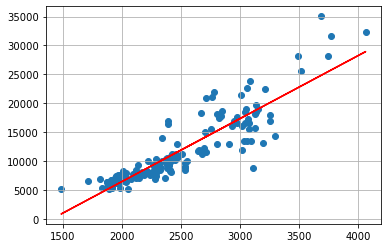

In [94]:
y = np.array(dataset.price)
x = np.array(dataset['curb-weight']).reshape(-1,1)

model = LinearRegression()
model.fit(x, y)

x_new = np.array(dataset['curb-weight'])
y_new = model.predict(x_new[:, np.newaxis])

r_sq = model.score(x, y)
print('coefficient of determination: ', r_sq)
print('intercept: ', model.intercept_)
print('slope: ', model.coef_)

m = model.coef_
b = model.intercept_

plt.plot(x, m*x + b, color='r')
plt.grid()
plt.scatter(x, y)
plt.show()

In [95]:
x_new = np.arange(start= 1488, stop = 4066).reshape((-1, 1))
y_pred = model.predict(x_new)
print('with x as ' , x_new,'predicted response:', y_pred, sep='\n')

with x as 
[[1488]
 [1489]
 [1490]
 ...
 [4063]
 [4064]
 [4065]]
predicted response:
[  839.48767566   850.38668269   861.28568973 ... 28904.43079165
 28915.32979868 28926.22880572]


### Polynomial Regression

In [96]:
import operator
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

Xây mô hình dự đoán

In [97]:
mad = ['drive-wheels','wheel-base','length','width','curb-weight',
'num-of-cylinders','engine-size','fuel-system','bore','horsepower']

In [98]:
y = np.array(dataset.price)
for i in mad:
    x = np.array(dataset[i]).reshape(-1,1)

    polynomial_features= PolynomialFeatures(degree=3)
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    print('Mean Square Error is '+ i +': ',rmse)
    print('R Square is '+ i +': ', r2)
    print('intercept:'+ i +': ', model.intercept_)
    print('slope:'+ i +': ', model.coef_)

Mean Square Error is drive-wheels:  4297.6012291733
R Square is drive-wheels:  0.46203458735341474
intercept:drive-wheels:  10241.0
slope:drive-wheels:  [    0.         -2491.13581781  -980.27443064  2041.44834369]
Mean Square Error is wheel-base:  3861.957251976039
R Square is wheel-base:  0.5655727604769409
intercept:wheel-base:  136283.90180987102
slope:wheel-base:  [ 0.00000000e+00 -2.63404152e+03  7.42636702e+00  6.48942208e-02]
Mean Square Error is length:  3428.510261097288
R Square is length:  0.6576163390799914
intercept:length:  -95372.22550188645
slope:length:  [ 0.00000000e+00  2.73752456e+03 -2.32604613e+01  6.34173895e-02]
Mean Square Error is width:  2998.1936805606097
R Square is width:  0.7381687416132052
intercept:width:  6864599.508383946
slope:width:  [ 0.00000000e+00 -3.03978860e+05  4.45207858e+03 -2.15080733e+01]
Mean Square Error is curb-weight:  2453.8135818921896
R Square is curb-weight:  0.8246179040088264
intercept:curb-weight:  3162.0871508457058
slope:curb

Xây dựng mô hình với curb-weight

In [99]:
y = np.array(dataset.price)
x = np.array(dataset['curb-weight']).reshape(-1,1)

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print('Mean Square Error is ',rmse)
print('R Square is ', r2)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print('with x as ' , x_poly,'predicted response:', y_poly_pred, sep='\n')

Mean Square Error is  2453.8135818921896
R Square is  0.8246179040088264
intercept: 3162.0871508457058
slope: [ 0.00000000e+00 -2.22007720e+00  1.64535345e-03  2.03715070e-07]
with x as 
[[1.00000000e+00 2.33700000e+03 5.46156900e+06 1.27636868e+10]
 [1.00000000e+00 2.82400000e+03 7.97497600e+06 2.25213322e+10]
 [1.00000000e+00 2.84400000e+03 8.08833600e+06 2.30032276e+10]
 [1.00000000e+00 3.08600000e+03 9.52339600e+06 2.93892001e+10]
 [1.00000000e+00 2.39500000e+03 5.73602500e+06 1.37377799e+10]
 [1.00000000e+00 2.39500000e+03 5.73602500e+06 1.37377799e+10]
 [1.00000000e+00 2.71000000e+03 7.34410000e+06 1.99025110e+10]
 [1.00000000e+00 2.76500000e+03 7.64522500e+06 2.11390471e+10]
 [1.00000000e+00 1.48800000e+03 2.21414400e+06 3.29464627e+09]
 [1.00000000e+00 1.87400000e+03 3.51187600e+06 6.58125562e+09]
 [1.00000000e+00 1.90900000e+03 3.64428100e+06 6.95693243e+09]
 [1.00000000e+00 1.87600000e+03 3.51937600e+06 6.60234938e+09]
 [1.00000000e+00 1.87600000e+03 3.51937600e+06 6.60234938

In [101]:
x = np.arange(5).reshape((-1, 1))
x_poly = polynomial_features.fit_transform(x)
y_poly_pred = model.predict(x_poly)
print('with x as ' , x_poly,'predicted response:', y_poly_pred, sep='\n')

with x as 
[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]
 [ 1.  4. 16. 64.]]
predicted response:
[3162.08715085 3159.8687192  3157.65357949 3155.44173293 3153.23318074]


## Test 2:

### Xử lý dataset
    Dữ liệu có dữ liệu dulicapte toàn bộ dòng, nhưng em không nghĩ ra cách loại bỏ những dòng đó, những dong bị dulicapte toàn dòng

In [ ]:
test2 = pd.read_csv('https://raw.githubusercontent.com/maxtran1997gmail/Files/main/loan_train.csv')
test2.drop(columns=['Unnamed: 0','Unnamed: 0.1'], inplace= True)
test2['effective_date'] = pd.to_datetime(test2['effective_date'],format='%m/%d/%Y')
test2['due_date'] = pd.to_datetime(test2['due_date'],format='%m/%d/%Y')
test2

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male
342,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male
343,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male
344,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male


In [ ]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   loan_status     346 non-null    object        
 1   Principal       346 non-null    int64         
 2   terms           346 non-null    int64         
 3   effective_date  346 non-null    datetime64[ns]
 4   due_date        346 non-null    datetime64[ns]
 5   age             346 non-null    int64         
 6   education       346 non-null    object        
 7   Gender          346 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 21.8+ KB


Kiểm tra dữ liệu trong dataset

In [ ]:
t2 = ['loan_status','Principal','terms','effective_date','due_date','age','education','Gender']
for i in t2:
    print(i+': ',list(set(test2[i])))

loan_status:  ['COLLECTION', 'PAIDOFF']
Principal:  [800, 900, 1000, 300, 500]
terms:  [7, 30, 15]
effective_date:  [Timestamp('2016-09-13 00:00:00'), Timestamp('2016-09-08 00:00:00'), Timestamp('2016-09-09 00:00:00'), Timestamp('2016-09-14 00:00:00'), Timestamp('2016-09-12 00:00:00'), Timestamp('2016-09-10 00:00:00'), Timestamp('2016-09-11 00:00:00')]
due_date:  [Timestamp('2016-11-09 00:00:00'), Timestamp('2016-10-13 00:00:00'), Timestamp('2016-10-12 00:00:00'), Timestamp('2016-10-07 00:00:00'), Timestamp('2016-09-18 00:00:00'), Timestamp('2016-10-08 00:00:00'), Timestamp('2016-09-28 00:00:00'), Timestamp('2016-10-11 00:00:00'), Timestamp('2016-10-25 00:00:00'), Timestamp('2016-11-10 00:00:00'), Timestamp('2016-10-09 00:00:00'), Timestamp('2016-09-22 00:00:00'), Timestamp('2016-09-19 00:00:00'), Timestamp('2016-09-17 00:00:00'), Timestamp('2016-11-12 00:00:00'), Timestamp('2016-10-10 00:00:00'), Timestamp('2016-09-23 00:00:00'), Timestamp('2016-09-27 00:00:00'), Timestamp('2016-09-26

Chuẩn hóa các dữ liệu category

In [ ]:
test2['loan_status'].replace({'COLLECTION':0, 'PAIDOFF':1}, inplace= True)
test2['education'].replace({'High School or Below':0, 'Bechalor':1, 'college':2, 'Master or Above':3}, inplace= True)
test2['Gender'].replace({'female':0, 'male':1}, inplace= True)

In [ ]:
test2['loan_day'] = test2['due_date'] - test2['effective_date']
test2['loan_day'] = test2['loan_day'].dt.days.astype('int64')
#df['tdColumn'] = df['tdColumn'].dt.days.astype('int16')
test2.info()
test2.head(10)
test2.duplicated()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   loan_status     346 non-null    int64         
 1   Principal       346 non-null    int64         
 2   terms           346 non-null    int64         
 3   effective_date  346 non-null    datetime64[ns]
 4   due_date        346 non-null    datetime64[ns]
 5   age             346 non-null    int64         
 6   education       346 non-null    int64         
 7   Gender          346 non-null    int64         
 8   loan_day        346 non-null    int64         
dtypes: datetime64[ns](2), int64(7)
memory usage: 24.5 KB


0      False
1      False
2      False
3      False
4      False
       ...  
341    False
342     True
343    False
344    False
345    False
Length: 346, dtype: bool

In [ ]:
duplicated = test2[test2.duplicated(subset= ['loan_status','Principal','terms','effective_date','due_date','age','education','Gender','loan_day'])]
duplicated.head(5)

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,loan_day
13,1,800,15,2016-09-10,2016-09-24,26,2,1,14
18,1,1000,30,2016-09-10,2016-10-09,26,2,1,29
29,1,1000,30,2016-09-11,2016-10-10,37,2,1,29
47,1,1000,30,2016-09-11,2016-10-10,27,0,1,29
52,1,1000,30,2016-09-11,2016-10-10,34,0,1,29


In [ ]:
test2dt = pd.DataFrame(test2, columns=['loan_status','Principal','terms','age','education','Gender','loan_day'])
X = pd.DataFrame(test2dt, columns=['Principal','terms','age','education','Gender','loan_day'])
test2dt.head(5)

,loan_status,Principal,terms,age,education,Gender,loan_day
0,1,1000,30,45,0,1,29
1,1,1000,30,33,1,0,29
2,1,1000,15,27,2,1,14
3,1,1000,30,28,2,0,29
4,1,1000,30,29,2,1,29


### Xây dụng mô hình Logistic Regression

In [ ]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
scaler = preprocessing.StandardScaler().fit(X)
scaler

StandardScaler()

In [ ]:
y = test2dt.loan_status
X_scaled = scaler.transform(X)
X_scaled

array([[ 0.51578458,  0.92071769,  2.33152555, -1.06604119,  0.42056004,
         0.53257725],
       [ 0.51578458,  0.92071769,  0.34170148, -0.00612667, -2.37778177,
         0.53257725],
       [ 0.51578458, -0.95911111, -0.65321055,  1.05378785,  0.42056004,
        -0.88417105],
       ...,
       [-1.31458942, -0.95911111,  1.33661351,  1.05378785,  0.42056004,
        -0.88417105],
       [ 0.51578458,  0.92071769, -0.48739188,  1.05378785,  0.42056004,
         3.36607386],
       [ 0.51578458,  0.92071769, -0.81902922,  1.05378785,  0.42056004,
         0.53257725]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

lr = logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1]


In [ ]:
accuracy_score(y_test, y_pred)

0.8160919540229885

## Test 3:

In [ ]:
test3 = pd.read_csv('wine.csv')
test3.set_axis(['Type','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total Phenols','Flavanoids','Nonflavanoids phenols','Proanthocyanins',
'Color intensify','Hue','OD280/OD315 of diluted wines','Proline'],axis=1, inplace= True)
test3.head(5)

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoids phenols,Proanthocyanins,Color intensify,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [ ]:
test3.info()
t3 = test3.columns.to_list()
for i in t3:
    print(i+': ',list(set(test3[i])))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Type                          177 non-null    int64  
 1   Alcohol                       177 non-null    float64
 2   Malic acid                    177 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity of ash             177 non-null    float64
 5   Magnesium                     177 non-null    int64  
 6   Total Phenols                 177 non-null    float64
 7   Flavanoids                    177 non-null    float64
 8   Nonflavanoids phenols         177 non-null    float64
 9   Proanthocyanins               177 non-null    float64
 10  Color intensify               177 non-null    float64
 11  Hue                           177 non-null    float64
 12  OD280/OD315 of diluted wines  177 non-null    float64
 13  Proli

In [ ]:
test3x = test3.drop(columns='Type', inplace= False)
test3x

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoids phenols,Proanthocyanins,Color intensify,Hue,OD280/OD315 of diluted wines,Proline
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Xây dưng mô hình Gaussian Naive Bayes

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from scipy.stats import pearsonr

In [ ]:
y = test3["Type"].values
X = test3x.iloc[:, :-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(y_pred)
print(y_test)

[1 3 2 1 2 2 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 2 1 2 2 2 2 2 2 3 2 1 3 1 1 1 3
 2 2 3 2 1 2 2 2 1 3 2 3 1 3 3 1 3 1 2 3 3 2 3 3 1 2 3 2 2 3 2 1 2 2 2 1 1
 2 2 3 3 2 2 2 3 3 1 3 2 2 2 2]
[1 3 2 1 2 2 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 3 1 1 1 3
 2 2 3 1 1 2 2 2 1 3 2 3 1 3 3 1 3 1 2 3 3 2 3 3 1 2 3 2 2 3 2 1 2 2 2 1 1
 2 2 3 3 2 2 2 3 3 1 3 2 2 2 2]


In [ ]:
accuracy_score(y_test, y_pred)

0.9662921348314607

so sánh với Logistic Regression

In [ ]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
lr = logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print(y_pred)
print(y_test)

[1 3 2 1 2 2 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 2 1 2 3 2 2 2 2 3 2 1 2 1 1 1 3
 2 2 3 2 1 2 2 2 1 3 2 3 1 3 3 1 3 2 2 3 3 2 3 3 1 2 3 2 2 3 2 1 2 2 2 1 1
 2 2 3 3 2 2 2 3 3 1 3 2 2 2 2]
[1 3 2 1 2 2 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 3 1 1 1 3
 2 2 3 1 1 2 2 2 1 3 2 3 1 3 3 1 3 1 2 3 3 2 3 3 1 2 3 2 2 3 2 1 2 2 2 1 1
 2 2 3 3 2 2 2 3 3 1 3 2 2 2 2]


In [ ]:
accuracy_score(y_test, y_pred)

0.9325842696629213